# Linear and logistic regression

In [2]:
#necessary imports
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

In [63]:
%matplotlib inline


## Diabetes dataset

In [64]:
# loading the dataset
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

In [65]:
print('the number of data we have is :',X.shape[0])
print("dimensions of data : ",X.shape)
print('the number of classes we have is :',np.unique(y).size)

the number of data we have is : 442
dimensions of data :  (442, 10)
the number of classes we have is : 214


### splitting the dataset

In [66]:
from sklearn.model_selection import train_test_split
# Split the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Linear regression

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

# Initialize the model
lin_reg = LinearRegression()

# Train the model
lin_reg.fit(X_train, y_train)

# Test the model
y_test_pred = lin_reg.predict(X_test)
y_train_pred = lin_reg.predict(X_train)

# Consider predictions within a certain tolerance as "accurate"
tolerance = 20

# Count the number of "accurate" predictions within the tolerance level
accurate_train_count = np.sum(np.abs(y_train - y_train_pred) < tolerance)
accurate_test_count = np.sum(np.abs(y_test - y_test_pred) < tolerance)

# Calculate the "accuracy" within the tolerance level
accuracy_train_tolerance = accurate_train_count / len(y_train)
accuracy_test_tolerance = accurate_test_count / len(y_test)
print("accuracy train :", accuracy_train_tolerance)
print("accuracy test:",accuracy_test_tolerance)

accuracy train : 0.28328611898017
accuracy test: 0.3146067415730337


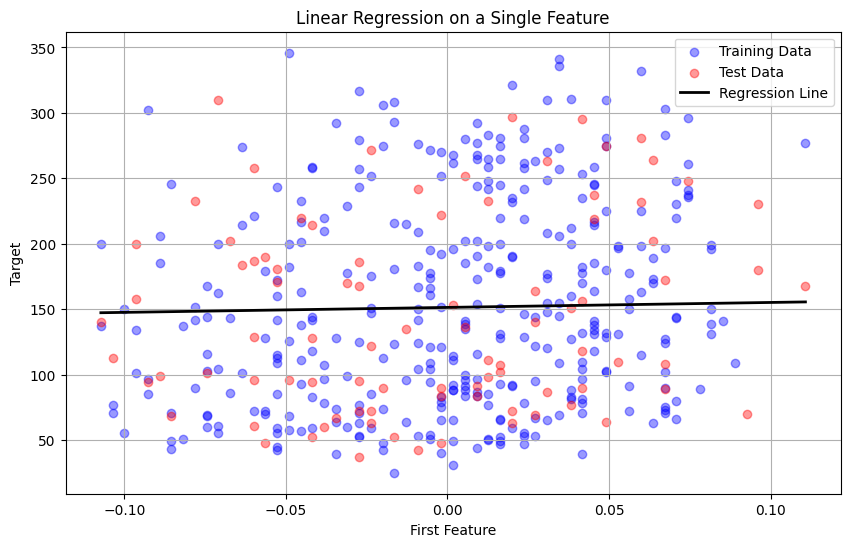

In [68]:
# Create the plot
plt.figure(figsize=(10, 6))

plt.scatter(X_train[:, 0], y_train, color='blue', label='Training Data', alpha=0.4)
plt.scatter(X_test[:, 0], y_test, color='red', label='Test Data', alpha=0.4)

x_line = np.linspace(min(X_train[:, 0]), max(X_train[:, 0]), 100).reshape(-1, 1)
# Creating a dummy feature matrix to match original shape
x_line_full = np.zeros((x_line.shape[0], X_train.shape[1]))
x_line_full[:, 0] = x_line[:, 0]
y_line = lin_reg.predict(x_line_full)

plt.plot(x_line, y_line, color='black', linewidth=2, label='Regression Line')

# Labels and title
plt.xlabel('First Feature')
plt.ylabel('Target')
plt.title('Linear Regression on a Single Feature')
plt.legend()
plt.grid(True)

plt.show()


## Logistic regression

In [69]:
!pip install seaborn

You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.


In [80]:
#necessary imports
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits, load_wine
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
digits = load_digits()
X = digits.data
y=digits.target

In [72]:
# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

 ### logistic regression on digits

In [73]:
# Initialize and train the Logistic Regression model
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)

# Evaluate the model
train_score = log_reg.score(X_train, y_train)
valid_score = log_reg.score(X_valid, y_valid)
test_score = log_reg.score(X_test, y_test)

# Manual calculation of accuracy
y_train_pred = log_reg.predict(X_train)
y_valid_pred = log_reg.predict(X_valid)
y_test_pred = log_reg.predict(X_test)

manual_train_accuracy = accuracy_score(y_train, y_train_pred)
manual_valid_accuracy = accuracy_score(y_valid, y_valid_pred)
manual_test_accuracy = accuracy_score(y_test, y_test_pred)

# Confirm that manual calculations match the model's score method
assert manual_train_accuracy == train_score
assert manual_valid_accuracy == valid_score
assert manual_test_accuracy == test_score

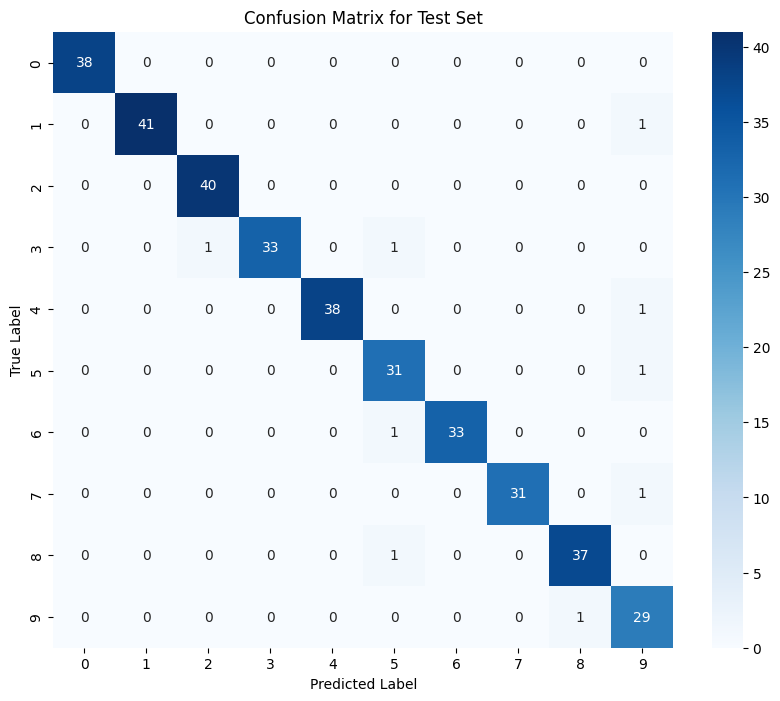

Manual Train Accuracy: 1.0
Manual Validation Accuracy: 0.9665738161559888
Manual Test Accuracy: 0.975


In [74]:
# Calculate and visualize the confusion matrix for the test set
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Using seaborn to visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_test, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Test Set')
plt.show()

# Print manual accuracy calculations
print(f'Manual Train Accuracy: {manual_train_accuracy}')
print(f'Manual Validation Accuracy: {manual_valid_accuracy}')
print(f'Manual Test Accuracy: {manual_test_accuracy}')

### decision tree on digits

smallest dimension where 95% of variance is explained :  27
the proportion of explained variencre in dimension 2 is :  0.28417973858066764


Text(0.5, 1.0, '2D PCA Visualization')

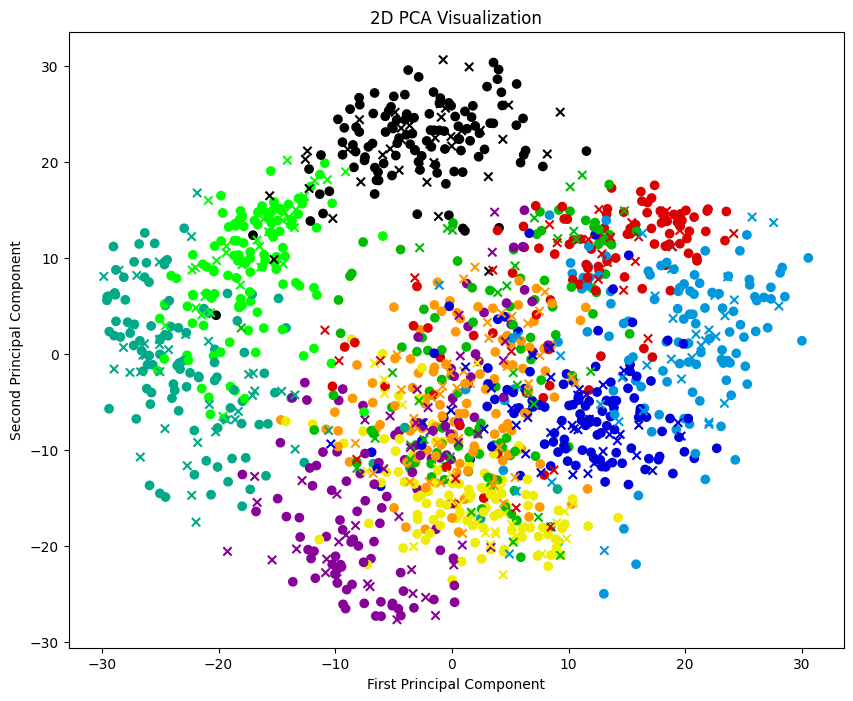

In [75]:
from sklearn import datasets
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn import manifold
nbCl = len(set(y))  # Number of unique classes in y
colors = [cm.nipy_spectral(float(i) / nbCl) for i in range(nbCl)]

# PCA
pca = PCA(n_components = 64)
pca.fit(X_train)
X_final = pca.transform(X)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
smallest_dimension = np.where(cumulative_variance > 0.95)[0][0]
print("smallest dimension where 95% of variance is explained : ", smallest_dimension)
pca2 = PCA(n_components=2)
pca.fit(X_train)
X_pca_train = pca.transform(X_train)
X_pca_val = pca.transform(X_valid)
X_pca_test = pca.transform(X_test)
print("the proportion of explained variencre in dimension 2 is : ",cumulative_variance[1])

# Assuming y_train and y_test are defined
col_train = [colors[c] for c in y_train]
col_test = [colors[c] for c in y_test]

# PCA Visualization
plt.figure(figsize=(10, 8))
plt.scatter(X_pca_train[:, 0], X_pca_train[:, 1], c=col_train, marker="o")
plt.scatter(X_pca_test[:, 0], X_pca_test[:, 1], c=col_test, marker="x")
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('2D PCA Visualization')

best depth :  14
best_min_samples : 14
Test accuracy: 0.8972222222222223


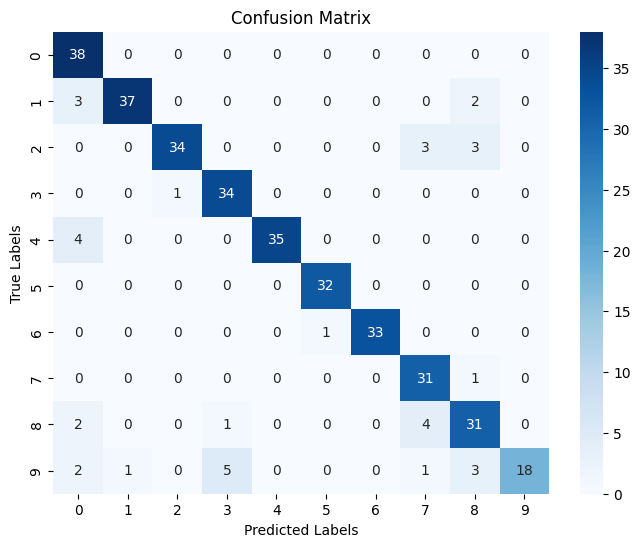

In [78]:
from sklearn import tree
best_depth = None
best_min_samples = None

best_acc = 0

for depth in range(1,15):
    for min_samples in range(2,15):
        myTree = tree.DecisionTreeClassifier(max_depth=depth,min_samples_split=min_samples,criterion="entropy")
        myTree.fit(X_pca_train, y_train)
        ypred = myTree.predict(X_pca_val)
        if accuracy_score(y_valid, ypred) > best_acc :
            best_depth=depth
            best_min_samples=min_samples
print("best depth : ",best_depth)
print("best_min_samples :",best_min_samples)
myTree = tree.DecisionTreeClassifier(max_depth=best_depth,min_samples_split=best_min_samples,criterion="entropy")
myTree.fit(X_pca_test,y_test)
y_test_pred=myTree.predict(X_pca_test)
# Compute accuracy on the validation data

print("Test accuracy:", accuracy_score(y_test, y_test_pred))


# Plot the confusion matrix using seaborn
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

## Wine dataset

In [81]:
wine = load_wine()
X = wine.data
y=wine.target

In [82]:
print('the number of data we have is :',X.shape[0])
print("dimensions of data : ",X.shape)
print('the number of classes we have is :',np.unique(y).size)

the number of data we have is : 178
dimensions of data :  (178, 13)
the number of classes we have is : 3


In [83]:
# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

 ### logistic regression on win

In [84]:
# Initialize and train the Logistic Regression model
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)

# Evaluate the model
train_score = log_reg.score(X_train, y_train)
valid_score = log_reg.score(X_valid, y_valid)
test_score = log_reg.score(X_test, y_test)

# Manual calculation of accuracy
y_train_pred = log_reg.predict(X_train)
y_valid_pred = log_reg.predict(X_valid)
y_test_pred = log_reg.predict(X_test)

manual_train_accuracy = accuracy_score(y_train, y_train_pred)
manual_valid_accuracy = accuracy_score(y_valid, y_valid_pred)
manual_test_accuracy = accuracy_score(y_test, y_test_pred)

# Confirm that manual calculations match the model's score method
assert manual_train_accuracy == train_score
assert manual_valid_accuracy == valid_score
assert manual_test_accuracy == test_score

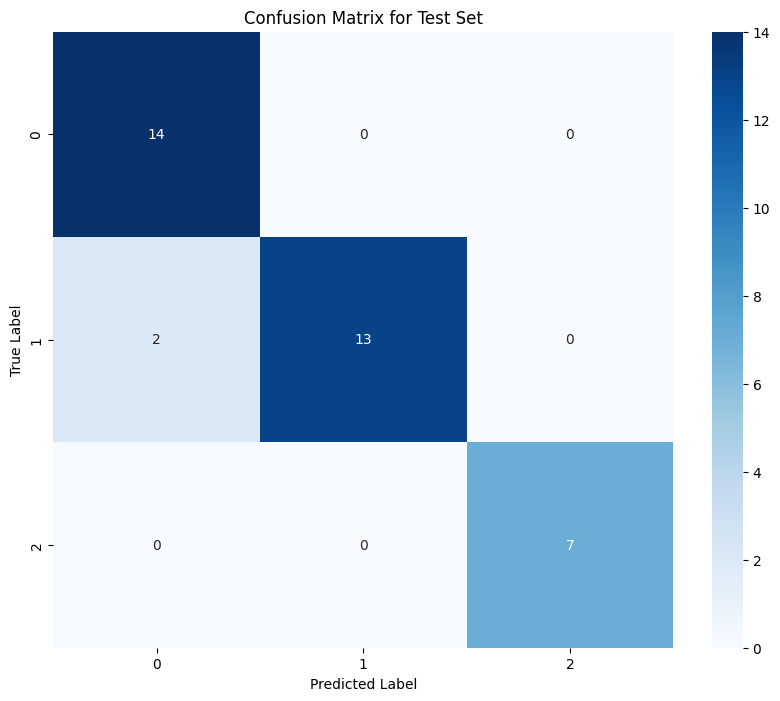

Manual Train Accuracy: 0.9905660377358491
Manual Validation Accuracy: 0.9722222222222222
Manual Test Accuracy: 0.9444444444444444


In [85]:
# Calculate and visualize the confusion matrix for the test set
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Using seaborn to visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_test, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Test Set')
plt.show()

# Print manual accuracy calculations
print(f'Manual Train Accuracy: {manual_train_accuracy}')
print(f'Manual Validation Accuracy: {manual_valid_accuracy}')
print(f'Manual Test Accuracy: {manual_test_accuracy}')

### decision tree on wine

smallest dimension where 95% of variance is explained :  0
the proportion of explained variencre in dimension 2 is :  0.9998114106470849


Text(0.5, 1.0, '2D PCA Visualization')

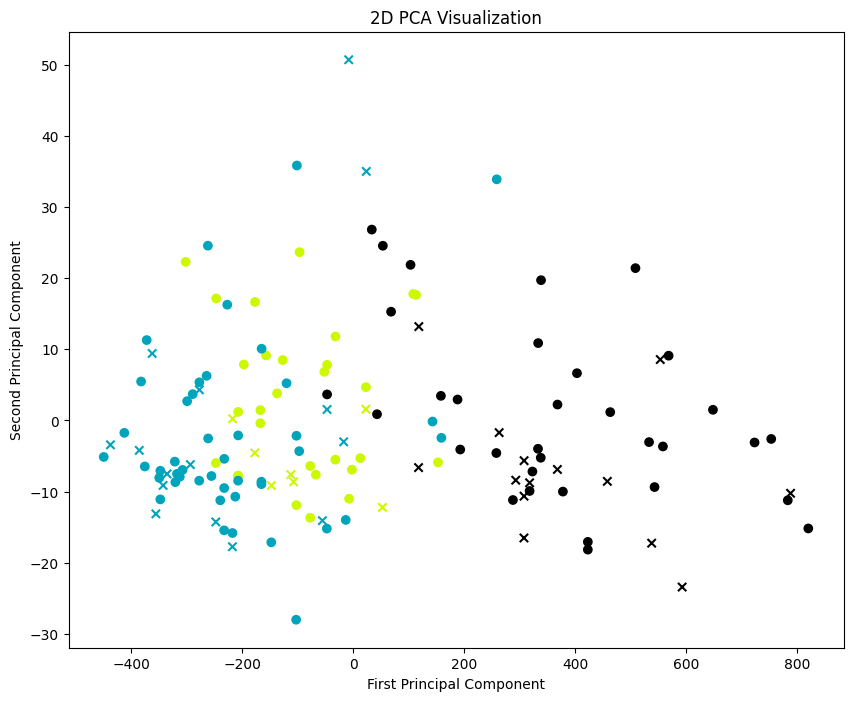

In [88]:
from sklearn import datasets
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn import manifold
nbCl = len(set(y))  # Number of unique classes in y
colors = [cm.nipy_spectral(float(i) / nbCl) for i in range(nbCl)]

# PCA
pca = PCA(n_components = 13)
pca.fit(X_train)
X_final = pca.transform(X)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
smallest_dimension = np.where(cumulative_variance > 0.95)[0][0]
print("smallest dimension where 95% of variance is explained : ", smallest_dimension)
pca2 = PCA(n_components=2)
pca.fit(X_train)
X_pca_train = pca.transform(X_train)
X_pca_val = pca.transform(X_valid)
X_pca_test = pca.transform(X_test)
print("the proportion of explained variencre in dimension 2 is : ",cumulative_variance[1])

# Assuming y_train and y_test are defined
col_train = [colors[c] for c in y_train]
col_test = [colors[c] for c in y_test]

# PCA Visualization
plt.figure(figsize=(10, 8))
plt.scatter(X_pca_train[:, 0], X_pca_train[:, 1], c=col_train, marker="o")
plt.scatter(X_pca_test[:, 0], X_pca_test[:, 1], c=col_test, marker="x")
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('2D PCA Visualization')

best depth :  14
best_min_samples : 14
Test accuracy: 1.0


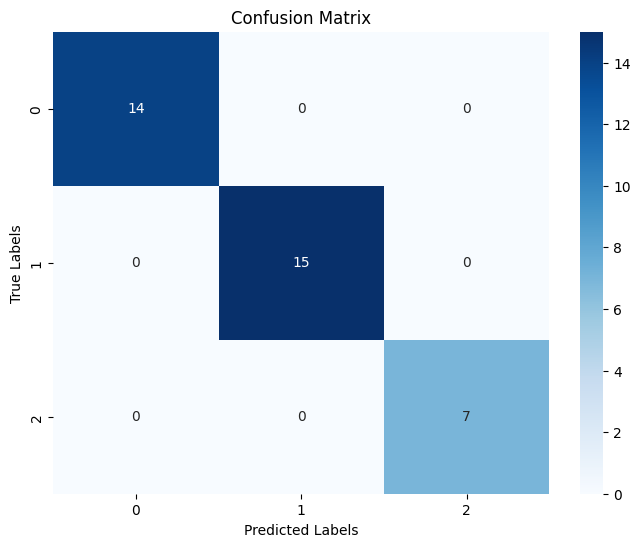

In [89]:
from sklearn import tree
best_depth = None
best_min_samples = None

best_acc = 0

for depth in range(1,15):
    for min_samples in range(2,15):
        myTree = tree.DecisionTreeClassifier(max_depth=depth,min_samples_split=min_samples,criterion="entropy")
        myTree.fit(X_pca_train, y_train)
        ypred = myTree.predict(X_pca_val)
        if accuracy_score(y_valid, ypred) > best_acc :
            best_depth=depth
            best_min_samples=min_samples
print("best depth : ",best_depth)
print("best_min_samples :",best_min_samples)
myTree = tree.DecisionTreeClassifier(max_depth=best_depth,min_samples_split=best_min_samples,criterion="entropy")
myTree.fit(X_pca_test,y_test)
y_test_pred=myTree.predict(X_pca_test)
# Compute accuracy on the validation data

print("Test accuracy:", accuracy_score(y_test, y_test_pred))


# Plot the confusion matrix using seaborn
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()